In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn import metrics

In [ ]:
df=pd.read_csv(r'/content/new_train.csv')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no


In [ ]:
df.shape

(32950, 16)

In [ ]:
df.isnull().sum()

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64

In [ ]:
df.duplicated().sum()

8

In [ ]:
df=df.drop_duplicates()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32942 entries, 0 to 32949
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          32942 non-null  int64 
 1   job          32942 non-null  object
 2   marital      32942 non-null  object
 3   education    32942 non-null  object
 4   default      32942 non-null  object
 5   housing      32942 non-null  object
 6   loan         32942 non-null  object
 7   contact      32942 non-null  object
 8   month        32942 non-null  object
 9   day_of_week  32942 non-null  object
 10  duration     32942 non-null  int64 
 11  campaign     32942 non-null  int64 
 12  pdays        32942 non-null  int64 
 13  previous     32942 non-null  int64 
 14  poutcome     32942 non-null  object
 15  y            32942 non-null  object
dtypes: int64(5), object(11)
memory usage: 4.3+ MB


In [ ]:
df.dtypes

age             int64
job            object
marital        object
education      object
default        object
housing        object
loan           object
contact        object
month          object
day_of_week    object
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome       object
y              object
dtype: object

In [ ]:
df.describe()

,age,duration,campaign,pdays,previous
count,32942.000000,32942.000000,32942.000000,32942.000000,32942.000000
mean,40.012810,258.159614,2.560804,962.043440,0.174762
std,10.403035,258.995259,2.752579,187.973035,0.499078
min,17.000000,0.000000,1.000000,0.000000,0.000000
25%,32.000000,103.000000,1.000000,999.000000,0.000000
50%,38.000000,180.000000,2.000000,999.000000,0.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000
max,98.000000,4918.000000,56.000000,999.000000,7.000000


In [ ]:
df.sample(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
7390,32,blue-collar,married,basic.9y,no,yes,no,telephone,may,fri,280,1,999,0,nonexistent,no
12925,34,management,married,university.degree,no,yes,yes,telephone,may,wed,145,1,999,0,nonexistent,no
21151,34,technician,single,professional.course,no,no,no,cellular,aug,wed,211,1,999,0,nonexistent,yes
32013,33,entrepreneur,married,university.degree,unknown,yes,no,cellular,may,wed,92,2,999,1,failure,no
536,38,admin.,married,university.degree,no,no,no,telephone,jun,fri,460,4,999,0,nonexistent,yes
32209,50,housemaid,married,basic.4y,no,no,no,telephone,may,tue,243,2,999,0,nonexistent,no
31921,36,admin.,married,university.degree,unknown,yes,no,cellular,aug,tue,361,4,999,0,nonexistent,no
32845,42,technician,single,university.degree,no,yes,no,cellular,may,mon,179,4,999,0,nonexistent,no
11543,56,retired,divorced,university.degree,no,yes,no,cellular,jun,mon,164,1,3,1,success,no
3755,45,blue-collar,single,basic.9y,no,yes,no,cellular,apr,mon,173,1,999,0,nonexistent,no


In [ ]:
df.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,32942,32942,32942,32942,32942,32942,32942,32942,32942,32942,32942
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,8312,19947,9733,26000,17251,27123,20903,11009,6854,28408,29230


Text(0.5, 1.0, 'Customers vs Target')

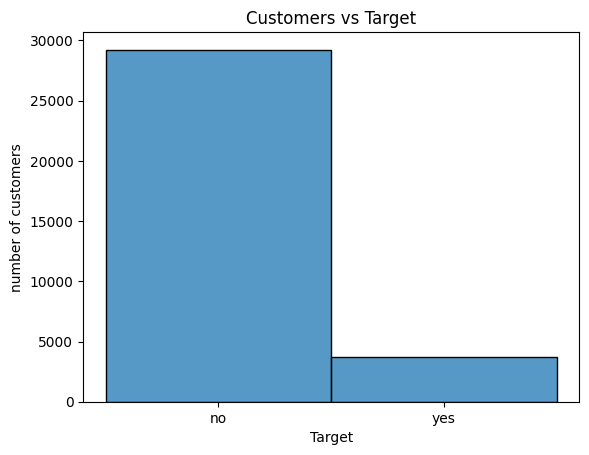

In [ ]:
sns.histplot(x=df.y)
plt.xlabel("Target")
plt.ylabel("number of customers")
plt.title("Customers vs Target")

In [ ]:
catcols=df.select_dtypes(include='object')
catcols.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [ ]:
numcols=df.select_dtypes(include='int64')
numcols.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

<ipython-input-17-c5d662e7cb74>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,fmt=".2f",linewidths=.8)


<Axes: >

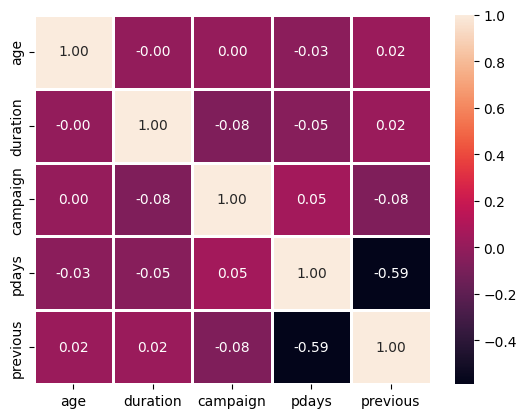

In [ ]:
sns.heatmap(df.corr(),annot=True,fmt=".2f",linewidths=.8)

<Axes: >

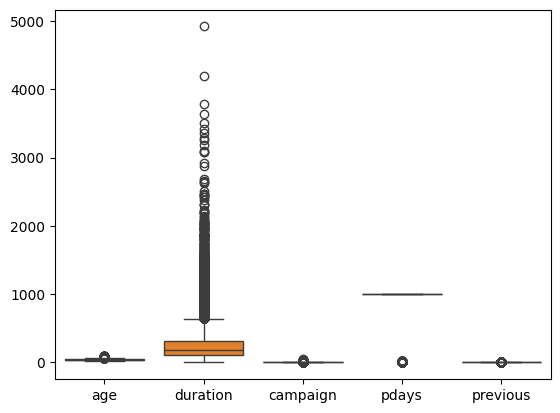

In [ ]:
sns.boxplot(data = df)

In [ ]:
def Find_Outliers(df):
    outliers = []
    for i in df.select_dtypes(include='number').columns:
        q1 = df[i].quantile(0.25)
        q3 = df[i].quantile(0.75)
        IQR = q3 - q1
        l1 = q1 - (IQR * 1.5)
        l2 = q3 + (IQR * 1.5)
        l3 = df[i] <= l1
        l4 = df[i] >= l2
        outliers_indices = ((df[i] < l1) | (df[i] > l2))
        outliers.extend(df[i][outliers_indices].index)
    return list(set(outliers))

outliers = Find_Outliers(df)
print('number of outliers: ' + str(len(outliers)))
#print('max outlier value: ' + str(df.iloc[outliers].max().max()))
#print('min outlier value: ' + str(df.iloc[outliers].min().min()))

number of outliers: 8509


In [ ]:
#DEFINE A FUNCTION CALLED OUTLIERS WHICH RETURNS A LIST OF INDEX OF OUTLIERS
def outliers(df,ft):
  Q1=df[ft].quantile(0.25)
  Q3=df[ft].quantile(0.75)
  IQR=Q3 - Q1

  lower_bound=Q1-1.5*IQR
  upper_bound=Q3+1.5*IQR

  ls=df.index[ (df[ft] < lower_bound) | (df[ft] > upper_bound) ]

  return ls

In [ ]:
#CREATE AN EMPTY LIST TO STORE THE OUTPUT INDICES FROM MULTIPLE ROWS
index_list=[]
for feature in ['age', 'duration', 'campaign', 'pdays', 'previous']:
  index_list.extend(outliers(df,feature))

In [ ]:
#DEFINE A FUNCTION CALLED REMOVE WHICH RETURNS A CLEANED DATA FRAME WITHOUT OUTLIERS
def remove(df,ls):
  ls=sorted(set(ls))
  df=df.drop(ls)
  return df

In [ ]:
df=remove(df,index_list)

In [ ]:
df.shape

(24433, 16)

<Axes: >

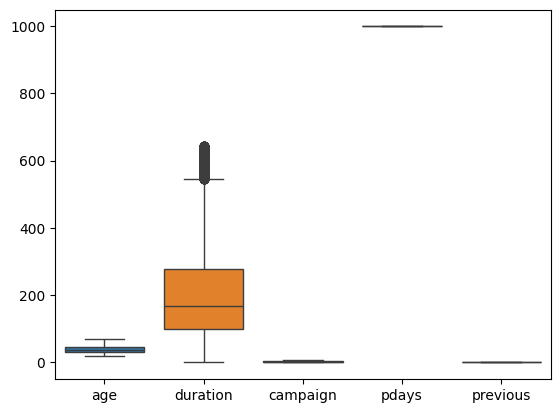

In [ ]:
sns.boxplot(data = df)

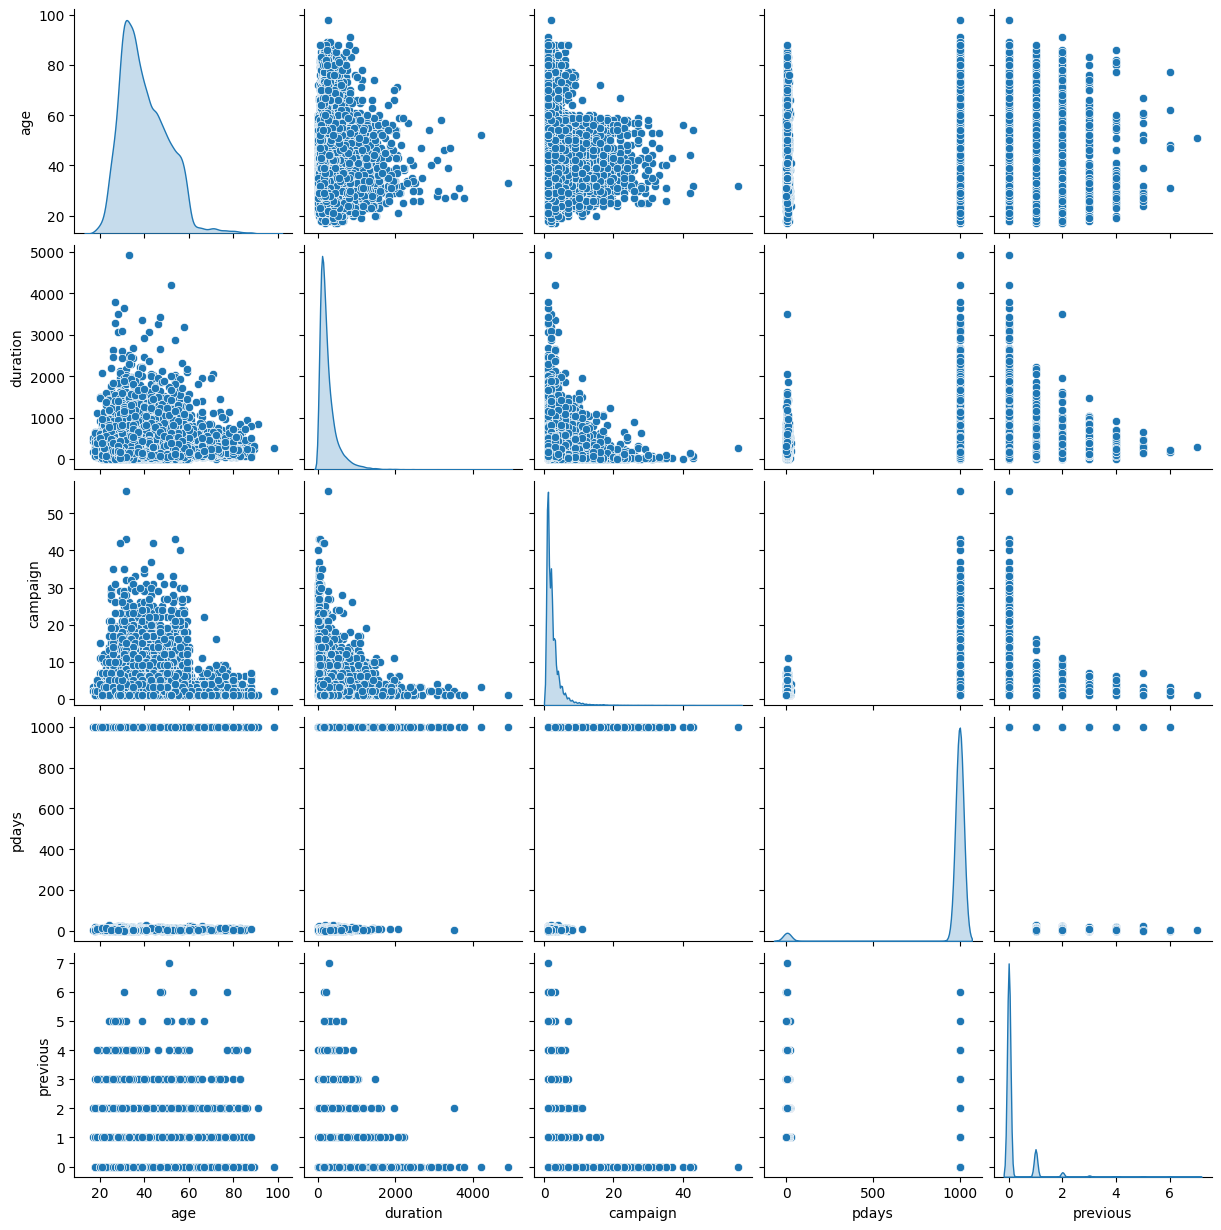

In [ ]:
sns.pairplot(data=numcols,diag_kind="kde")

In [ ]:
from sklearn.preprocessing import LabelEncoder                   #This code uses LabelEncoder from scikit-learn to transform the target variable ("y") into numerical labels.
le=LabelEncoder()                                                 # pd.get_dummies from the pandas library to perform one-hot encoding on categorical columns. The drop_first=True parameter is used to drop the first level of each categorical variable to avoid the "dummy variable trap."
df["y"]=le.fit_transform(df["y"])
df=pd.get_dummies(data=df, drop_first=True, columns=catcols.columns)

In [ ]:
df

,age,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,y_1
0,49,227,4,999,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,36,120,2,999,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
4,59,368,2,999,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
5,29,256,2,999,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6,26,449,1,999,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32943,47,64,3,999,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
32945,28,192,1,999,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32947,54,131,4,999,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
32948,29,165,1,999,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
X=df.drop(["y_1"],axis=1)
y=df[["y_1"]]
X.head()

,age,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,49,227,4,999,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,36,120,2,999,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
4,59,368,2,999,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
5,29,256,2,999,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,26,449,1,999,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
std =StandardScaler()
X=std.fit_transform(X)

In [ ]:
from sklearn.feature_selection import SelectFromModel  #a feature selection method in scikit-learn that selects features based on the importance weights computed by an estimator.
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(X_train, y_train) #helpful in reducing the dimensionality of our dataset and potentially improving the performance of our model by focusing on the most informative features.

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_from_model.py:357: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


SelectFromModel(estimator=RandomForestClassifier())

In [ ]:
sel.get_support()         # instance returns a boolean mask indicating which features are selected (True) and which are not selected (False). This can be useful for filtering your original feature set based on the feature selection process

array([ True,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False,  True, False, False, False,
        True,  True, False, False,  True, False, False, False, False,
       False])

In [ ]:
models = {                                                                            #training several machine learning models using scikit-learn on your training data (X_train and y_train).
    "                   Logistic Regression": LogisticRegression(),
    "                              AdaBoost": AdaBoostClassifier(),
    "                   K-Nearest Neighbors": KNeighborsClassifier(),
    "                Support Vector Machine": SVC(),
    "                          RandomForest": RandomForestClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + " trained.")

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

                   Logistic Regression trained.
                              AdaBoost trained.
                   K-Nearest Neighbors trained.


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                Support Vector Machine trained.


<ipython-input-35-4660933590e5>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


                          RandomForest trained.


In [ ]:
for name, model in models.items():
    print(name + ": {:.2f}%".format(model.score(X_test, y_test) * 100))                     #code is using the score method to evaluate the accuracy of each trained model on the test data (X_test and y_test)

                   Logistic Regression: 94.78%
                              AdaBoost: 94.33%
                   K-Nearest Neighbors: 94.09%
                Support Vector Machine: 94.74%
                          RandomForest: 94.50%


In [ ]:
y_pred=model.predict(X_test)
from sklearn.metrics import confusion_matrix,accuracy_score
mt = confusion_matrix(y_test,y_pred)

In [ ]:
accuracy_score(y_test,y_pred)

0.9449560057294863

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      4630
           1       0.42      0.12      0.19       257

    accuracy                           0.94      4887
   macro avg       0.69      0.56      0.58      4887
weighted avg       0.93      0.94      0.93      4887



<Axes: >

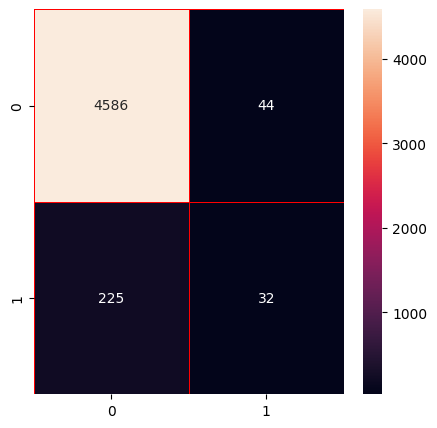

In [ ]:
f,ax = plt.subplots(figsize=(5,5))
sns.heatmap(mt,annot = True,linewidths = 0.5,linecolor = "red",fmt = ".0f",ax=ax)             # parameter adds annotations (values) to the cells
                                                                                              # formats the annotations as integers.